# Personal Information
Name: **Wouter Knibbe**

StudentID: **12795526**

Email: [**wouter.knibbe@student.uva.nl**](wouter.knibbe@student.uva.nl)

Github **https://github.com/WouterKnibbe/ATSP_hillForHard**

Submitted on: **05.03.2024**

In [2]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import algorithm

In [3]:
def mutate_matrix(_matrix, _upper, _print):
    matrix = _matrix.copy()
    number1, number2 = 0, 0

    while number1 == number2:
        number1, number2 = np.random.randint(0,matrix.shape[0]), np.random.randint(0,matrix.shape[0])
    previous_number = matrix[number1,number2]
    while matrix[number1,number2] == previous_number:
        matrix[number1,number2] = np.random.randint(1,_upper)
    if _print:
        print(_matrix[number1,number2].round(1), "at", (number1,number2), "becomes", matrix[number1,number2].round(1))

    return matrix

In [4]:
def custom_decoder(obj):
    """
    Custom decoder function that converts specific JSON values back to their original types.
    Converts:
    - 'Infinity' to np.inf
    """
    if isinstance(obj, dict):
        for key, value in obj.items():
            if value == "Infinity":
                obj[key] = np.inf
            # elif isinstance(value, list):
                # Convert lists back to arrays
                # obj[key] = np.array(value)
            elif isinstance(value, dict):
                obj[key] = custom_decoder(value)
    elif isinstance(obj, list):
        for i, value in enumerate(obj):
            if value == "Infinity":
                obj[i] = np.inf
            # elif isinstance(value, list):
                # obj[i] = np.array(value)
            elif isinstance(value, dict):
                obj[i] = custom_decoder(value)
    return obj

def load_result(file_path):

  # Loading the JSON file with custom decoding
  with open(file_path, "r") as json_file:
      loaded_results = json.load(json_file, object_hook=custom_decoder)

  return loaded_results

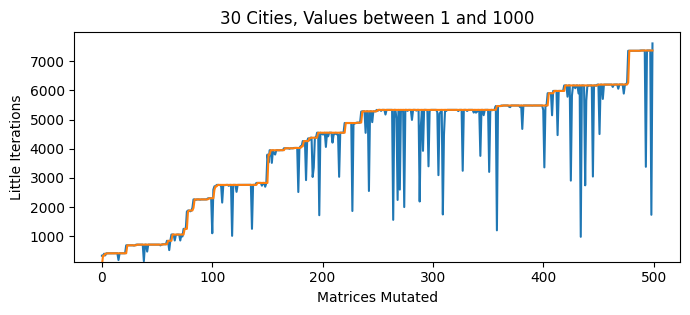

In [10]:
cities = [30]
ranges = [1000]

subplot_rows = len(cities)
subplot_cols = len(ranges)

fig, axs = plt.subplots(subplot_rows, subplot_cols, figsize=(7, 3.25)) 

for i, city in enumerate(cities):
    for j, range_val in enumerate(ranges):
        path = f"Results/results{city}_{range_val}_4.json"
        loaded = load_result(path)
        
        x_values = list(loaded.keys())
        y_values_0 = [values[0] for values in loaded.values()]  
        y_values_1 = [values[1] for values in loaded.values()] 
        
        if subplot_rows == 1 and subplot_cols == 1:
            ax = axs
            ax.set_xlabel('Matrices Mutated')
        else:
            if subplot_rows > 1 and subplot_cols > 1:
                ax = axs[i, j]
            elif subplot_rows > 1:
                ax = axs[i]
            else:
                ax = axs[j]

        ax.plot(x_values, y_values_0, label='Current mutation')
        ax.plot(x_values, y_values_1, label='Hardest mutation')

        ax.set_xticks(list(range(0,600,100)))
        ax.set_xticklabels(list(range(0,600,100)))

        ax.set_ylim(bottom=min(y_values_0)-(min(y_values_0)/7))
        if j == 0:
          ax.set_ylabel('Little Iterations')
        if i == 1:
          ax.set_xlabel('Matrices Mutated')
        ax.set_title(f'{city} Cities, Values between 1 and {range_val}')
        if i == 1 & j== 1:
          ax.legend()

plt.tight_layout()
plt.show()

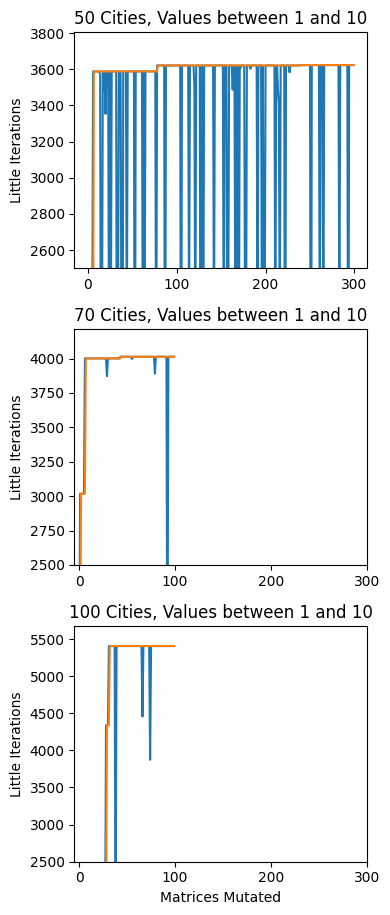

In [ ]:
cities = [50, 70, 100]
ranges = [10]

subplot_rows = len(cities)
subplot_cols = len(ranges)

fig, axs = plt.subplots(subplot_rows, subplot_cols, figsize=(4, 9.25)) 

for i, city in enumerate(cities):
    for j, range_val in enumerate(ranges):
        path = f"Results/results{city}_{range_val}_0.json"
        loaded = load_result(path)
        
        x_values = list(loaded.keys())
        y_values_0 = [values[0] for values in loaded.values()]  
        y_values_1 = [values[1] for values in loaded.values()] 
        
        if subplot_rows == 1 and subplot_cols == 1:
            ax = axs
            ax.set_xlabel('Matrices Mutated')
        else:
            if subplot_rows > 1 and subplot_cols > 1:
                ax = axs[i, j]
            elif subplot_rows > 1:
                ax = axs[i]
            else:
                ax = axs[j]

        ax.plot(x_values, y_values_0, label='Current mutation')
        ax.plot(x_values, y_values_1, label='Hardest mutation')

        ax.set_xticks(list(range(0,400,100)))
        ax.set_xticklabels(list(range(0,400,100)))

        ax.set_ylim(bottom=2500)
        if j == 0:
          ax.set_ylabel('Little Iterations')
        if i == 2:
          ax.set_xlabel('Matrices Mutated')
        ax.set_title(f'{city} Cities, Values between 1 and {range_val}')
        if i == 1 & j== 1:
          ax.legend()

plt.tight_layout()
plt.show()

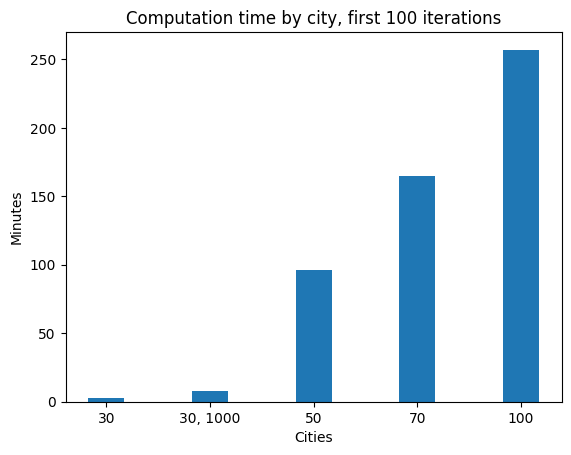

In [ ]:
cities = ["30", "30, 1000", "50", "70", "100"]
times = [2.9, 8, 96, 165, 257]
y_values_0 = []
y_values_1 = []

for i, city in enumerate(cities):
    if city == "30, 1000":
        path = "Results/results30_1000_4.json"
    else:
        path = f"Results/results{city}_10_0.json"
    loaded = load_result(path)
    loaded = dict(list(loaded.items())[:100])
    y_values_0.append(sum([values[0] for values in loaded.values()]))
    y_values_1.append(y_values_0[i]/times[i])

# Setting up the plot
x = np.arange(len(cities))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects = ax.bar(x, times, width)

# Adding some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Cities')
ax.set_ylabel('Minutes')
ax.set_title('Computation time by city, first 100 iterations')
ax.set_xticks(x)
ax.set_xticklabels(cities)

# Displaying the plot
plt.show()

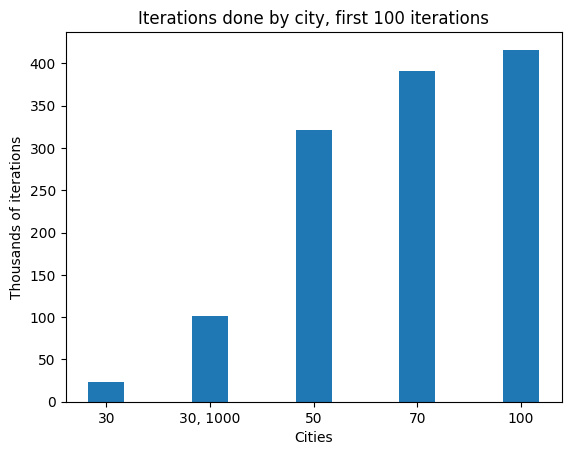

In [ ]:
cities = ["30", "30, 1000", "50", "70", "100"]
times = [2.9, 8, 96, 165, 257]
y_values_0 = []
y_values_1 = []

for i, city in enumerate(cities):
    if city == "30, 1000":
        path = "Results/results30_1000_4.json"
    else:
        path = f"Results/results{city}_10_0.json"
    loaded = load_result(path)
    loaded = dict(list(loaded.items())[:100])
    y_values_0.append(sum([values[0] for values in loaded.values()])/1000)
    y_values_1.append(y_values_0[i]/times[i])

# Setting up the plot
x = np.arange(len(cities))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects = ax.bar(x, y_values_0, width)

# Adding some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Cities')
ax.set_ylabel('Thousands of iterations')
ax.set_title('Iterations done by city, first 100 iterations')
ax.set_xticks(x)
ax.set_xticklabels(cities)

# Displaying the plot
plt.show()

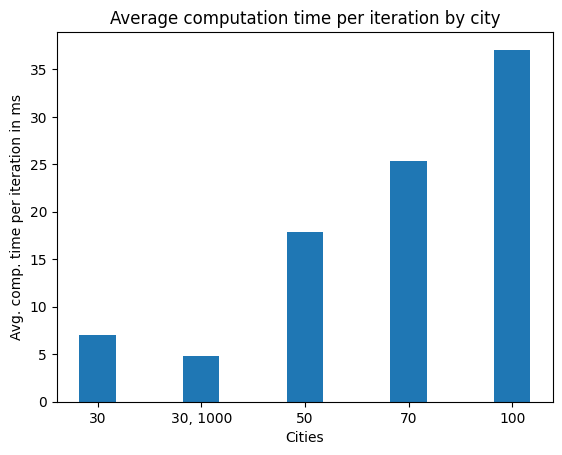

In [ ]:
cities = ["30", "30, 1000", "50", "70", "100"]
times = [19.1, 161.75, 297, 165, 257]
y_values_0 = []
y_values_1 = []

for i, city in enumerate(cities):
    if city == "30, 1000":
        path = "Results/results30_1000_4.json"
    else:
        path = f"Results/results{city}_10_0.json"
    loaded = load_result(path)
    y_values_0.append(sum([values[0] for values in loaded.values()]))
    y_values_1.append(times[i]/y_values_0[i]*60000)

# Setting up the plot
x = np.arange(len(cities))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects = ax.bar(x, y_values_1, width)

# Adding some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Cities')
ax.set_ylabel('Avg. comp. time per iteration in ms')
ax.set_title('Average computation time per iteration by city')
ax.set_xticks(x)
ax.set_xticklabels(cities)

# Displaying the plot
plt.show()

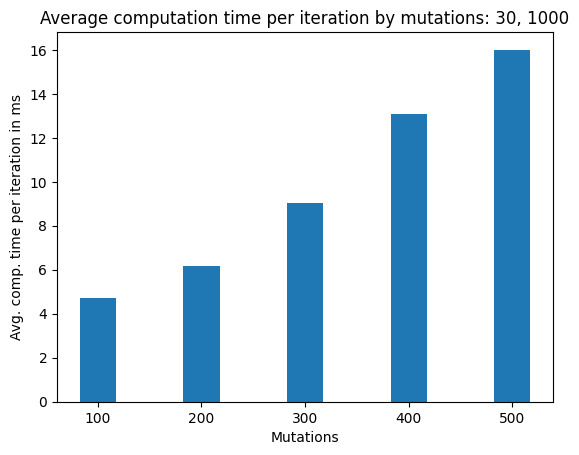

In [9]:
path = "Results/results30_1000_4.json"
loaded = load_result(path)

loaded_slices = []
for i in range(0, len(loaded), 100):
    loaded_slice = {k: loaded[k] for k in list(loaded.keys())[i:i+100]}
    loaded_slices.append(loaded_slice)

# Now you have 5 variables, each containing 100 items
loaded_1, loaded_2, loaded_3, loaded_4, loaded_5 = loaded_slices

# Define times
times = [478.89, 2041.60, 4324.76, 6806.61, 9705.03]

# Calculate y_values_0 for each loaded variable
y_values_0_sequences = []
for loaded_var in [loaded_1, loaded_2, loaded_3, loaded_4, loaded_5]:
    y_values_0_sequence = sum([values[0] for values in loaded_var.values()])
    y_values_0_sequences.append(y_values_0_sequence)

# Calculate y_values_1 using y_values_0_sequences and times
y_values_1 = []
for i in range(len(y_values_0_sequences)):
    y_values_1.append(times[i] / y_values_0_sequences[i] * 1000)

# Setting up the plot
iterations = list(range(100,600,100))
x = np.arange(len(iterations))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects = ax.bar(x, y_values_1, width)

# Adding some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Mutations')
ax.set_ylabel('Avg. comp. time per iteration in ms')
ax.set_title('Average computation time per iteration by mutations: 30, 1000')
ax.set_xticks(x)
ax.set_xticklabels(iterations)

# Displaying the plot
plt.show()

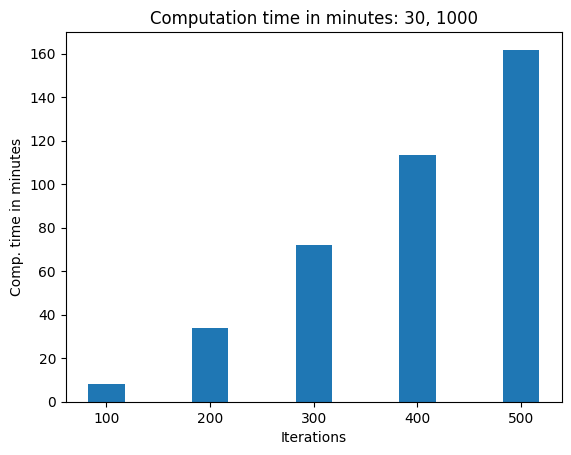

In [7]:
# Define times
times = [x/60 for x in [478.89, 2041.60, 4324.76, 6806.61, 9705.03]]

# Setting up the plot
iterations = list(range(100,600,100))
x = np.arange(len(iterations))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects = ax.bar(x, times, width)

# Adding some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Iterations')
ax.set_ylabel('Comp. time in minutes')
ax.set_title('Computation time in minutes: 30, 1000')
ax.set_xticks(x)
ax.set_xticklabels(iterations)

# Displaying the plot
plt.show()

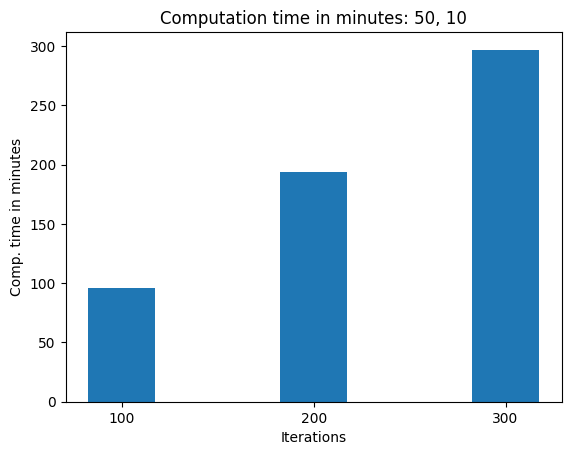

In [8]:
from datetime import datetime

# Define the starting time
start_time = datetime.strptime("14:27", "%H:%M")

# List of end times
end_times = ["16:03", "17:41", "19:24"]

# Calculate time differences in minutes
times = [(datetime.strptime(end_time, "%H:%M") - start_time).total_seconds() / 60 for end_time in end_times]

# Setting up the plot
iterations = list(range(100,400,100))
x = np.arange(len(iterations))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects = ax.bar(x, times, width)

# Adding some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Iterations')
ax.set_ylabel('Comp. time in minutes')
ax.set_title('Computation time in minutes: 50, 10')
ax.set_xticks(x)
ax.set_xticklabels(iterations)

# Displaying the plot
plt.show()

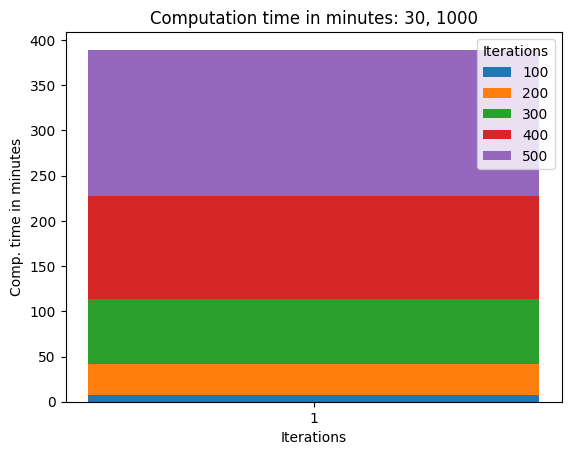

In [97]:
# Define times and labels
times = [x/60 for x in [478.89, 2041.60, 4324.76, 6806.61, 9705.03]]
labels = ['100', '200', '300', '400', '500']

# Setting up the plot
fig, ax = plt.subplots()
rects = ax.bar('1', times[0], label=labels[0])

# Stack the bars
for i in range(1, len(times)):
    ax.bar('1', times[i], bottom=sum(times[:i]), label=labels[i])

# Adding some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Iterations')
ax.set_ylabel('Comp. time in minutes')
ax.set_title('Computation time in minutes: 30, 1000')
ax.legend(title="Iterations")

# Displaying the plot
plt.show()

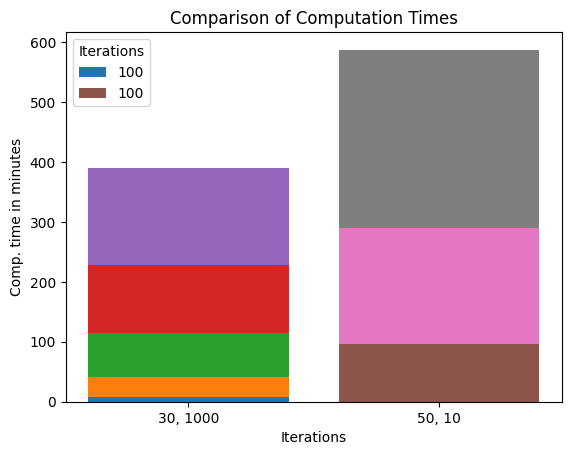

In [100]:
from datetime import datetime

# Define the starting time and end times
start_time = datetime.strptime("14:27", "%H:%M")
end_times = ["16:03", "17:41", "19:24"]

# Calculate time differences in minutes
times_2 = [(datetime.strptime(end_time, "%H:%M") - start_time).total_seconds() / 60 for end_time in end_times]

# Setting up the plot again to combine both sets of data
fig, ax = plt.subplots()

# First stacked bar from the previous plot
for i in range(len(times)):
    ax.bar('1', times[i], bottom=sum(times[:i]), label=labels[i] if i == 0 else "")

# Second stacked bar for the new data
for i in range(len(times_2)):
    ax.bar('2', times_2[i], bottom=sum(times_2[:i]), label=labels[i] if i == 0 else "")

# Adding some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Iterations')
ax.set_ylabel('Comp. time in minutes')
ax.set_title('Comparison of Computation Times')
ax.legend(title="Iterations")

# Adjusting the x-axis to show labels for both bars
ax.set_xticks(['1', '2'])
ax.set_xticklabels(['30, 1000', '50, 10'])

# Displaying the plot
plt.show()

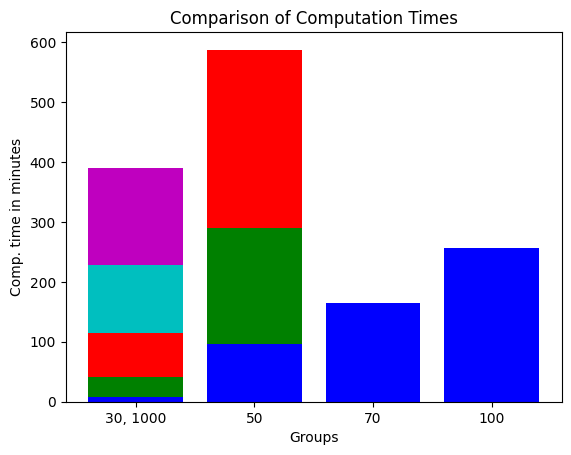

In [110]:
# Re-plotting with consistent colors and labels for both bars

# Initialize the figure again
fig, ax = plt.subplots()

# Define a color map
colors = ['b', 'g', 'r', 'c', 'm']

# Create the first stacked bar
bottom = 0
for i, (time, color) in enumerate(zip(times, colors)):
    ax.bar('1', time, bottom=bottom, label=f'{labels[i]} iterations' if not bottom else "", color=color)
    bottom += time

# Create the second stacked bar with the same color mapping
bottom = 0
for i, (time, color) in enumerate(zip(times_2, colors)):
    ax.bar('2', time, bottom=bottom, label=f'{labels[i]} iterations' if not bottom else "", color=color)
    bottom += time

bottom = 0
ax.bar('3', 165, bottom=bottom, label=f'{labels[i]} iterations' if not bottom else "", color='b')
bottom += 165

bottom = 0
ax.bar('4', 257, bottom=bottom, label=f'{labels[i]} iterations' if not bottom else "", color='b')
bottom += 257

# Adding labels and title
ax.set_xlabel('Groups')
ax.set_ylabel('Comp. time in minutes')
ax.set_title('Comparison of Computation Times')

# Set x-ticks
ax.set_xticks(['1', '2', '3', '4'])
ax.set_xticklabels(['30, 1000', '50', '70', '100'])

# Displaying the plot
plt.show()


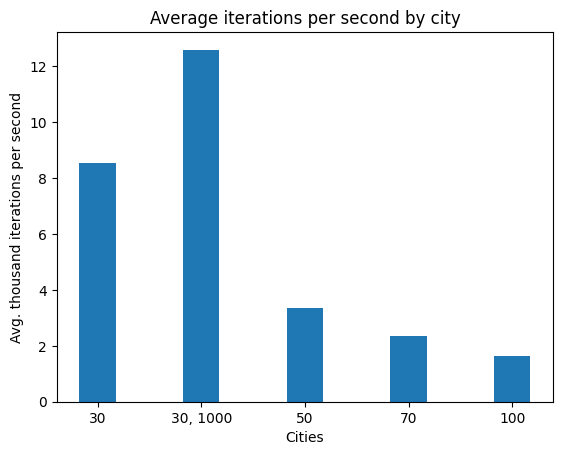

In [81]:
cities = ["30", "30, 1000", "50", "70", "100"]
times = [19.1, 161.75, 297, 165, 257]
y_values_0 = []
y_values_1 = []

for i, city in enumerate(cities):
    if city == "30, 1000":
        path = "Results/results30_1000_4.json"
    else:
        path = f"Results/results{city}_10_0.json"
    loaded = load_result(path)
    y_values_0.append(sum([values[0] for values in loaded.values()]))
    y_values_1.append(y_values_0[i]/times[i]/1000)

# Setting up the plot
x = np.arange(len(cities))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects = ax.bar(x, y_values_1, width)

# Adding some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Cities')
ax.set_ylabel('Avg. thousand iterations per second')
ax.set_title('Average iterations per second by city')
ax.set_xticks(x)
ax.set_xticklabels(cities)

# Displaying the plot
plt.show()

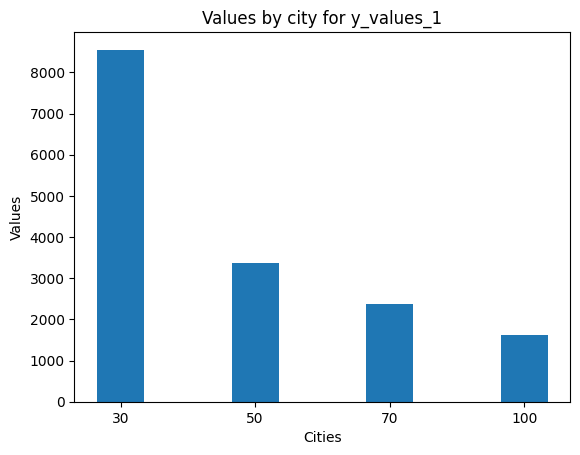

In [ ]:
cities = [30, 50, 70, 100]
times = [19.1, 297, 165, 257]
y_values_0 = []
y_values_1 = []

for i, city in enumerate(cities):
    path = f"Results/results{city}_10_0.json"
    loaded = load_result(path)
    
    y_values_0.append(sum([values[0] for values in loaded.values()]))
    y_values_1.append(y_values_0[i]/times[i])

# Setting up the plot
x = np.arange(len(cities))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects = ax.bar(x, y_values_1, width, label='y_values_1')

# Adding some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Cities')
ax.set_ylabel('Values')
ax.set_title('Values by city for y_values_1')
ax.set_xticks(x)
ax.set_xticklabels(cities)

# Displaying the plot
plt.show()

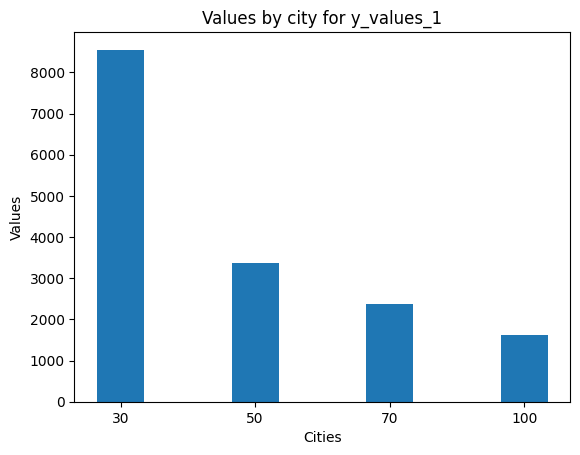

In [ ]:
cities = [30, 50, 70, 100]
times = [19.1, 297, 165, 257]
y_values_0 = []
y_values_1 = []

for i, city in enumerate(cities):
    path = f"Results/results{city}_10_0.json"
    loaded = load_result(path)
    
    y_values_0.append(sum([values[0] for values in loaded.values()]))
    y_values_1.append(y_values_0[i]/times[i])

# Setting up the plot
x = np.arange(len(cities))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects = ax.bar(x, y_values_1, width, label='y_values_1')

# Adding some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Cities')
ax.set_ylabel('Values')
ax.set_title('Values by city for y_values_1')
ax.set_xticks(x)
ax.set_xticklabels(cities)

# Displaying the plot
plt.show()

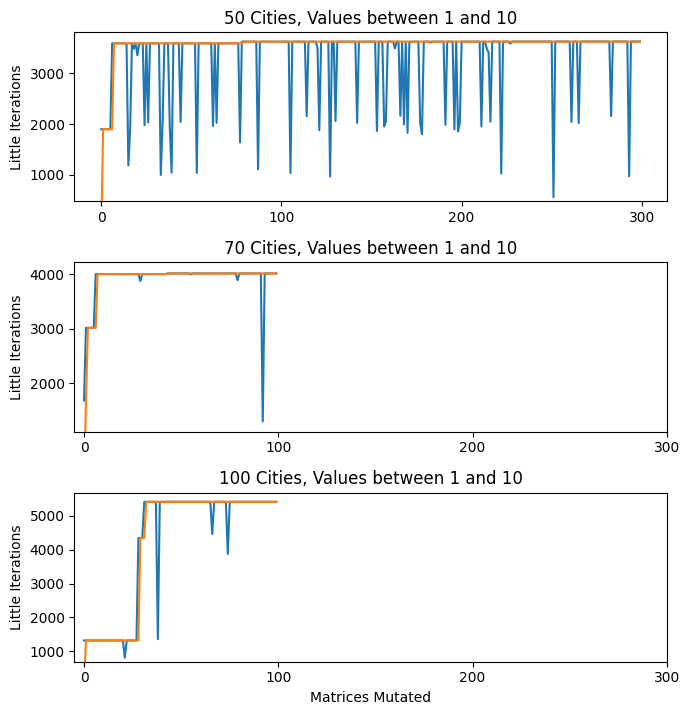

In [ ]:
[19.1, 161.75, 297, 165, 257]
cities = [50, 70, 100]
ranges = [10]

subplot_rows = len(cities)
subplot_cols = len(ranges)

fig, axs = plt.subplots(subplot_rows, subplot_cols, figsize=(7, 7.25)) 

for i, city in enumerate(cities):
    for j, range_val in enumerate(ranges):
        path = f"Results/results{city}_{range_val}_0.json"
        loaded = load_result(path)
        
        x_values = list(loaded.keys())
        y_values_0 = [values[0] for values in loaded.values()]  
        y_values_1 = [values[1] for values in loaded.values()] 
        
        if subplot_rows == 1 and subplot_cols == 1:
            ax = axs
            ax.set_xlabel('Matrices Mutated')
        else:
            if subplot_rows > 1 and subplot_cols > 1:
                ax = axs[i, j]
            elif subplot_rows > 1:
                ax = axs[i]
            else:
                ax = axs[j]

        ax.plot(x_values, y_values_0, label='Current mutation')
        ax.plot(x_values, y_values_1, label='Hardest mutation')

        ax.set_xticks(list(range(0,400,100)))
        ax.set_xticklabels(list(range(0,400,100)))

        ax.set_ylim(bottom=min(y_values_0)-(min(y_values_0)/7))
        if j == 0:
          ax.set_ylabel('Little Iterations')
        if i == 2:
          ax.set_xlabel('Matrices Mutated')
        ax.set_title(f'{city} Cities, Values between 1 and {range_val}')
        if i == 1 & j== 1:
          ax.legend()

plt.tight_layout()
plt.show()

### Analysis 4: Characteristics on the data

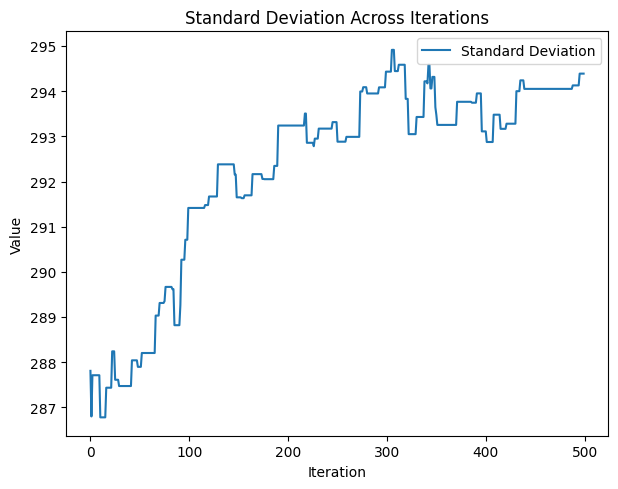

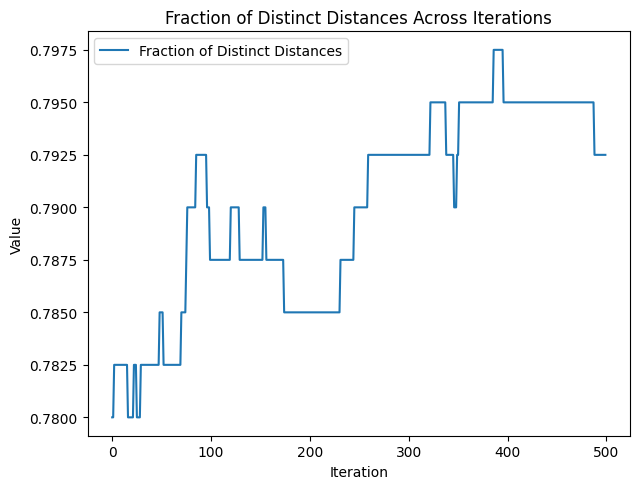

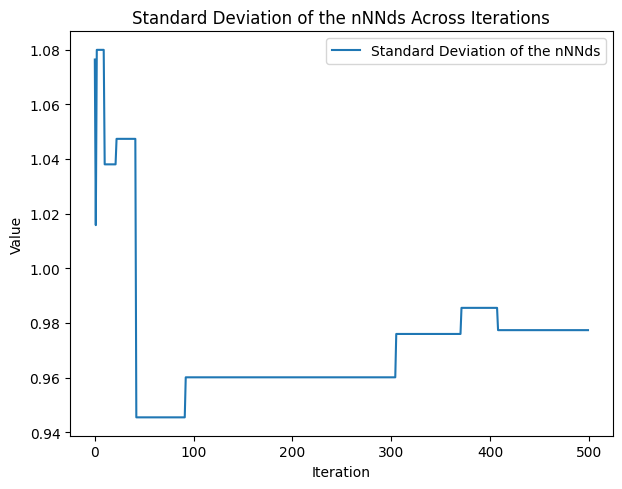

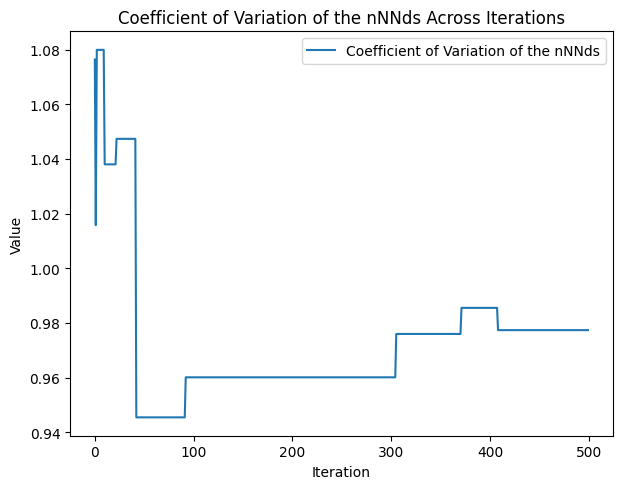

In [42]:
path = f"Results/results20_1000_0.json"
loaded = load_result(path)
l = []

hardest_matrices = []
for values in loaded.values():
    if values[0] > values[1]:
        hardest_matrices.append(values[4])
    else:
        hardest_matrices.append(hardest_matrices[-1])

for x in hardest_matrices:
    # Excluding infinite values for some calculations
    finite_distances = np.ma.masked_invalid(x)

    # 1. Standard Deviation (SD)
    sd = np.std(finite_distances)

    # 4. Fraction of Distinct Distances
    unique_distances = np.unique(finite_distances)
    fraction_distinct = unique_distances.size / finite_distances.size

    # 6. Standard Deviation of the Normalized Nearest-Neighbour Distances (nNNd)
    nearest = np.min(x, axis=1)
    mean_nearest = np.mean(nearest)
    normalized_nNNd = nearest / mean_nearest
    sd_nNNd = np.std(normalized_nNNd)

    # 7. Coefficient of Variation of the nNNds
    cv_nNNd = sd_nNNd / np.mean(normalized_nNNd)

    l.append([sd, fraction_distinct, sd_nNNd, cv_nNNd])

data = np.array(l)
for i, x in enumerate(['Standard Deviation', 'Fraction of Distinct Distances', 
                        'Standard Deviation of the nNNds',
                        'Coefficient of Variation of the nNNds']):
    plt.figure(figsize=(7, 5.25))
    plt.plot(data[:, i], label=x)
    plt.xlabel('Iteration')
    plt.ylabel('Value')
    plt.title(f'{x} Across Iterations')
    plt.legend()
    plt.show()

#### Standard deviation

20 cities, between 1 and 1000, pearson statistic: 0.704, Pvalue: 0.0
Pvalue rounded to 10 decimals


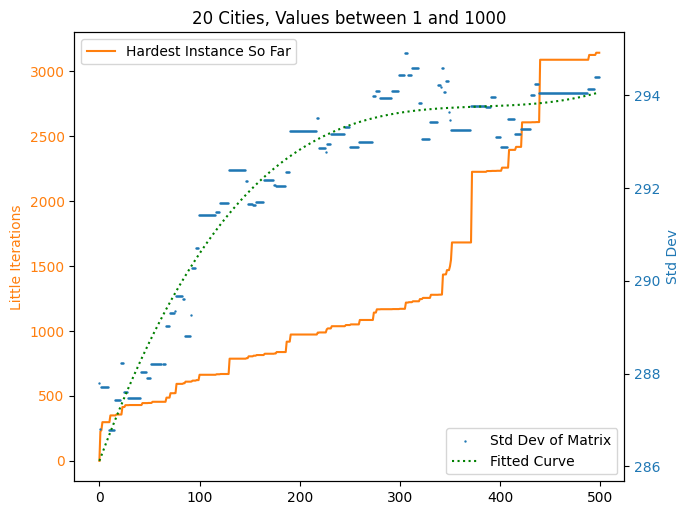

In [43]:
from scipy.stats import pearsonr

cities = [20]
ranges = [1000]

subplot_rows = len(cities)
subplot_cols = len(ranges)

fig, axs = plt.subplots(subplot_rows, subplot_cols, figsize=(7, 5.25)) 

for i, city in enumerate(cities):
    for j, range_val in enumerate(ranges):
        path = f"Results/results{city}_{range_val}_0.json"
        loaded = load_result(path)
        
        # matrices of hardest instances at every mutation
        hardest_matrices = []
        for values in loaded.values():
            if values[0] > values[1]:
                hardest_matrices.append(values[4])
            else:
                hardest_matrices.append(hardest_matrices[-1])
        
        # these are just list comprehensions but instead of lists they are numpy arrays
        # numpy arrays make it easy to remove duplicates before we get to the correlation calculation
        y_values_std = np.fromiter((np.std(np.ma.masked_invalid(x)) for x in hardest_matrices), float)
        y_values = np.fromiter((values[1] for values in loaded.values()), float)
        x_values = list(range(len(y_values)))
        
        if subplot_rows > 1 and subplot_cols > 1:
            ax = axs[i, j]
        elif subplot_rows > 1:
            ax = axs[i]
        else:
            ax = axs[j] if subplot_cols > 1 else axs

        # Plot the sorted current instances
        color = 'tab:orange'
        ax.plot(x_values, y_values, label='Hardest Instance So Far', color=color)
        ax.set_ylabel('Little Iterations', color=color)
        ax.tick_params(axis='y', labelcolor=color)

        # Create a twin y-axis to plot the standard deviation
        ax2 = ax.twinx()
        color = 'tab:blue'
        ax2.scatter(x_values, y_values_std, label='Std Dev of Matrix', color=color, s=0.5)
        ax2.set_ylabel('Std Dev', color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        # Plot the fitted curve
        poly_deg = 3
        ax2.plot(x_values, np.poly1d(np.polyfit(x_values, y_values_std, poly_deg))(x_values), label='Fitted Curve', color='green', linestyle=':')
        
        if i == 1:
          ax.set_xlabel('Matrices Mutated')
        ax.set_title(f'{city} Cities, Values between 1 and {range_val}')
        ax.legend()
        ax2.legend(loc='lower right')
        
        # remove duplicates before pearson correlation
        y_values_std = y_values_std[np.ma.unique(y_values,True)[1]]
        y_values = y_values[np.ma.unique(y_values,True)[1]]
        
        print(f"{city} cities, between 1 and {range_val}, pearson statistic: {round(pearsonr(y_values_std, y_values)[0],3)}, Pvalue: {round(pearsonr(y_values_std, y_values)[1],10)}")
print("Pvalue rounded to 10 decimals")

plt.tight_layout()
plt.show()

#### Fraction of Distinct Distances

20 cities, between 1 and 1000, pearson statistic: 0.746, Pvalue: 0.0
Pvalue rounded to 10 decimals


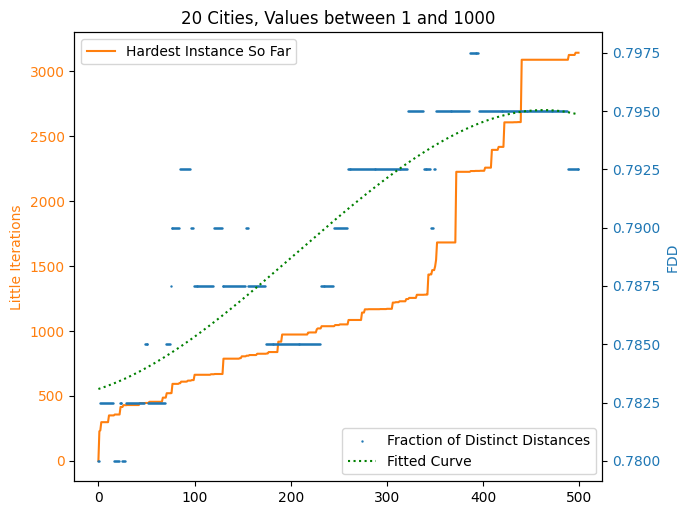

In [44]:
cities = [20]
ranges = [1000]

subplot_rows = len(cities)
subplot_cols = len(ranges)

fig, axs = plt.subplots(subplot_rows, subplot_cols, figsize=(7, 5.25)) 

for i, city in enumerate(cities):
    for j, range_val in enumerate(ranges):
        path = f"Results/results{city}_{range_val}_0.json"
        loaded = load_result(path)

        # matrices of hardest instances at every mutation
        hardest_matrices = []
        for values in loaded.values():
            if values[0] > values[1]:
                hardest_matrices.append(values[4])
            else:
                hardest_matrices.append(hardest_matrices[-1])

        finite_distances = [np.ma.masked_invalid(x) for x in hardest_matrices]
        y_values_fdd = np.fromiter((np.unique(values).size / values.size for values in finite_distances),float)
        y_values = np.fromiter((values[1] for values in loaded.values()),float)
        x_values = list(range(len(y_values)))
        
        if subplot_rows > 1 and subplot_cols > 1:
            ax = axs[i, j]
        elif subplot_rows > 1:
            ax = axs[i]
        else:
            ax = axs[j] if subplot_cols > 1 else axs

        # Plot the sorted current instances
        color = 'tab:orange'
        ax.plot(x_values, y_values, label='Hardest Instance So Far', color=color)
        ax.set_ylabel('Little Iterations', color=color)
        ax.tick_params(axis='y', labelcolor=color)

        # Create a twin y-axis to plot the standard deviation
        ax2 = ax.twinx()
        color = 'tab:blue'
        ax2.scatter(x_values, y_values_fdd, label='Fraction of Distinct Distances', color=color, s=0.5)
        ax2.set_ylabel('FDD', color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        # Plot the fitted curve
        x_values = range(500)
        poly_deg = 3
        ax2.plot(x_values, np.poly1d(np.polyfit(x_values, y_values_fdd, poly_deg))(x_values), label='Fitted Curve', color='green', linestyle=':')
        
        if i == 1:
          ax.set_xlabel('Matrices Mutated')
        ax.set_title(f'{city} Cities, Values between 1 and {range_val}')
        ax.legend()
        ax2.legend(loc='lower right')

        y_values_fdd = y_values_fdd[np.ma.unique(y_values,True)[1]]
        y_values = y_values[np.ma.unique(y_values,True)[1]]
        print(f"{city} cities, between 1 and {range_val}, pearson statistic: {round(pearsonr(y_values_fdd, y_values)[0],3)}, Pvalue: {round(pearsonr(y_values_fdd, y_values)[1],10)}")
print("Pvalue rounded to 10 decimals")
    
plt.tight_layout()
plt.show()

#### Std Dev of nNNds

20 cities, between 1 and 1000, pearson statistic: -0.137, Pvalue: 0.2452008422
Pvalue rounded to 10 decimals


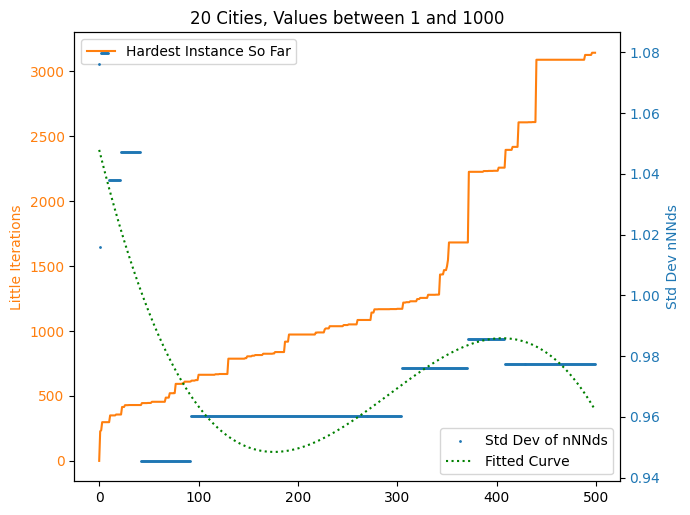

In [45]:
cities = [20]
ranges = [1000]

subplot_rows = len(cities)
subplot_cols = len(ranges)

fig, axs = plt.subplots(subplot_rows, subplot_cols, figsize=(7, 5.25)) 

for i, city in enumerate(cities):
    for j, range_val in enumerate(ranges):
        path = f"Results/results{city}_{range_val}_0.json"
        loaded = load_result(path)

        # matrices of hardest instances at every mutation
        hardest_matrices = []
        for values in loaded.values():
            if values[0] > values[1]:
                hardest_matrices.append(values[4])
            else:
                hardest_matrices.append(hardest_matrices[-1])
        
        y_values_nearest = [np.min(x, axis=1) for x in hardest_matrices]
        y_values_mean_nearest = [np.mean(values) for values in y_values_nearest]
        # normalize distances and take std
        y_values_sd_nNNd = np.fromiter((np.std(x/y) for x,y in zip(y_values_nearest,y_values_mean_nearest)),float)

        y_values = np.fromiter((values[1] for values in loaded.values()),float)
        x_values = list(range(len(y_values)))
        
        if subplot_rows > 1 and subplot_cols > 1:
            ax = axs[i, j]
        elif subplot_rows > 1:
            ax = axs[i]
        else:
            ax = axs[j] if subplot_cols > 1 else axs

        # Plot the sorted current instances
        color = 'tab:orange'
        ax.plot(x_values, y_values, label='Hardest Instance So Far', color=color)
        ax.set_ylabel('Little Iterations', color=color)
        ax.tick_params(axis='y', labelcolor=color)

        # Create a twin y-axis to plot the standard deviation
        ax2 = ax.twinx()
        color = 'tab:blue'
        ax2.scatter(x_values, y_values_sd_nNNd, label='Std Dev of nNNds', color=color, s=1)
        ax2.set_ylabel('Std Dev nNNds', color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        # Plot the fitted curve
        x_values = range(500)
        poly_deg = 3
        ax2.plot(x_values, np.poly1d(np.polyfit(x_values, y_values_sd_nNNd, poly_deg))(x_values), label='Fitted Curve', color='green', linestyle=':')

        if i == 1:
          ax.set_xlabel('Matrices Mutated')
        ax.set_title(f'{city} Cities, Values between 1 and {range_val}')
        ax.legend()
        ax2.legend(loc='lower right')

        y_values_sd_nNNd = y_values_sd_nNNd[np.ma.unique(y_values,True)[1]]
        y_values = y_values[np.ma.unique(y_values,True)[1]]
        print(f"{city} cities, between 1 and {range_val}, pearson statistic: {round(pearsonr(y_values_sd_nNNd, y_values)[0],3)}, Pvalue: {round(pearsonr(y_values_sd_nNNd, y_values)[1],10)}")
print("Pvalue rounded to 10 decimals")

plt.tight_layout()
plt.show()